In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np

import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

# 1. Preliminary
Let's make the notion of gradient calculation for quantum circuits a little more concrete. Suppose you have a parameterized circuit like this one:

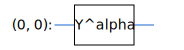

In [2]:
qubit = cirq.GridQubit(0, 0)
my_circuit = cirq.Circuit(cirq.Y(qubit)**sympy.Symbol('alpha'))
SVGCircuit(my_circuit)

In [3]:
pauli_x = cirq.X(qubit)
pauli_x

cirq.X(cirq.GridQubit(0, 0))

In [4]:
def my_expectation(op, alpha):
    """Compute <Y(alpha)| `op` | Y(alpha)> """
    params = {'alpha': alpha}
    sim = cirq.Simulator()
    final_state = sim.simulate(my_circuit, params).final_state
    return op.expectation_from_wavefunction(final_state, {qubit: 0}).real

my_alpha = 0.3
print('Expectation=', my_expectation(pauli_x, my_alpha))
print('Sim Formula=', np.sin(np.pi * my_alpha))

Expectation= 0.80901700258255
Sim Formula= 0.8090169943749473


In [5]:
def my_grad(obs, alpha, eps=0.01):
    grad = 0
    f_x = my_expectation(obs, alpha + obs)
    f_x_prime = my_expectation(obs, alpha + eps)
    return ((f_x_prime - f_x) / eps).real

print('Finite Difference: ', my_grad(pauli_x, my_alpha))
print('Cosine formula: ', np.pi.cos(np.pi * my_alpha))

ValueError: Circuit contains ops whose symbols were not specified in parameter sweep. Ops: [(cirq.Y**sympy.Symbol('alpha')).on(cirq.GridQubit(0, 0))]